In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
(X_train,y_train),(X_test,y_test) =keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
len(X_train),len(y_train)

(60000, 60000)

In [5]:
len(X_test),len(y_test)

(10000, 10000)

In [6]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
X_train[0].shape

(28, 28)

In [9]:
X_train[50].shape

(28, 28)

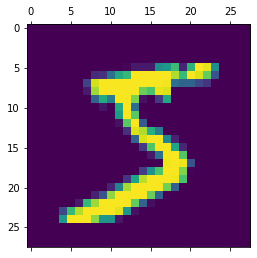

In [10]:
plt.matshow(X_train[0])# index 0 is will have to be classified as 5

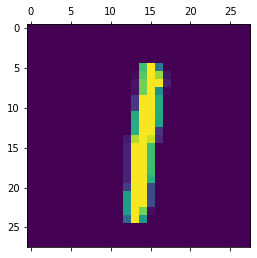

In [11]:
plt.matshow(X_train[40]) #index 40 has to classified as 1

Normalization of Data the image pixel range's from 0 to 255

In [12]:
X_train =X_train /255
X_test =X_test /255

In [13]:
X_train[0] # here we got the value that are normalized format

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Here we need to convert the matrix type of data into vector type which means  we need to flatted the matrxi we need to convert ne 2D to 1D

In [14]:
X_train.shape[0]

60000

In [15]:
X_train_flatten =X_train.reshape(len(X_train),28*28)
X_test_flatten =X_test.reshape(len(X_test) ,28*28)

In [16]:
#X_train_flatten.shape[1] =n_features
n_features =X_train_flatten.shape[1]

In [17]:
from tensorflow.keras.optimizers import RMSprop

In [18]:
import tensorflow as tf
model =keras.Sequential([
    keras.layers.Dense(10,input_dim =n_features,activation ="sigmoid"),
    keras.layers.Dense(8,activation ="sigmoid"),
    keras.layers.Dense(1,activation ='sigmoid')
])
optimizer =RMSprop(0.001)
model.compile( optimizer='adam',loss ="mean_squared_error",metrics=['accuracy'])
model.fit(X_train_flatten,y_train,batch_size =10,verbose =1,epochs =5)

Epoch 1/5
6000/6000 [==============================] - 9s 762us/step - loss: 20.4291 - accuracy: 0.1122
Epoch 2/5
6000/6000 [==============================] - 5s 851us/step - loss: 20.2778 - accuracy: 0.1124
Epoch 3/5
6000/6000 [==============================] - 5s 872us/step - loss: 20.2774 - accuracy: 0.1124
Epoch 4/5
6000/6000 [==============================] - 5s 769us/step - loss: 20.2774 - accuracy: 0.1124
Epoch 5/5
6000/6000 [==============================] - 6s 1ms/step - loss: 20.2774 - accuracy: 0.1124


In [19]:
model.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 1s 611us/step - loss: 20.2422 - accuracy: 0.1135


[20.24220085144043, 0.11349999904632568]

In [20]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
def create_model(optimizer=RMSprop(0.01)):
    model =keras.Sequential([
        keras.layers.Dense(10,input_dim =n_features,activation ="sigmoid"),
        keras.layers.Dense(8,activation ="relu"),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer =optimizer,loss ="mean_squared_error",metrics =['accuracy'])
    return model
epochs =[5,10,15,20,50,100]
batch_size =[10,20,30,45,60,80,90]
param_grid =dict(batch_size =batch_size,epochs =epochs)
gsv =GridSearchCV(estimator =model,param_grid=param_grid,verbose =1,n_jobs=-1,scoring='neg_mean_squared_error')
grid_result =gsv.fit(X_train,y_train)
#print("Best %f using %s" %(grid_result.best_score_,grid_result.best_params_))

TypeError: Cannot clone object '<tensorflow.python.keras.engine.sequential.Sequential object at 0x000001D64214B0D0>' (type <class 'tensorflow.python.keras.engine.sequential.Sequential'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
#defining the model
def create_model(optimizer=RMSprop(0.01)):
    model =keras.Sequential()
    model.add(Dense(10, activation ='relu',input_shape=(n_features,)))
    model.add(Dense(8,activation ='relu'))
    model.add(Dense(1))
    #optimizer =RMSprop(0.1)
    model.compile(optimizer =optimizer,loss ='mean_squared_error',metrics =['mse'])
    return model
model =KerasRegressor(build_fn=create_model, verbose=1)

#defining the hyperparameters for grid to be validated
batch_size =[10,20,30,40,50,60,70,80,90,100]
epochs =[10,50,75,100]
param_grid =dict(batch_size =batch_size,epochs =epochs)
grid =GridSearchCV(estimator =model,param_grid =param_grid,scoring ='neg_mean_squared_error',n_jobs =-1)
# run the GridSearchCV process
grid_result  =grid.fit(X_train,y_train)
#print the results
print("Best %f using %s" %(grid_result.best_score_,grid_result.best_params_))